<a href="https://colab.research.google.com/github/prashanthi-ch/portfolio/blob/master/housing_advanced_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Regression Surprise Housing Assignment
## Step1. Reading & Understanding the data       
 ## Step2. EDA & Data Cleaning
    * Visualization of target variable saleprice
    * visualization of categorical columns
    * correlation of the variables
    * Top 10 correlated variables with target

## Step3. Data Preparation
    * Get the length of the categorical variables
    * One Hot Encoding
    * Dropping original categorical variables
    * Merge the original data and dummies data
    * Divide the data into X and y for building the model

## Step4. housing data into Train & Test Dataset
    
## Step5. Scaling using MinMaxScalar
  
## Step6. Model Building and Evalution
    * Linear Regression
    * Ridge Regression
    * Lasso Regression
    * Compare the Linear, Ridge and Lasso Coefficents    
## Step7. Conclusion

### Import Required Python Libraries


In [451]:
# Importing numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt
import math

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklearn_metrics
%matplotlib inline


#Importing Machine Learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


### Adjusting Screen Width

In [452]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

###  Step 1: Reading & Understanding the data
 

In [453]:

# Input data files are available in google drive
# connecting colab with google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


##### i.Importing the train Data


In [545]:
house_df = pd.read_csv("/content/gdrive/MyDrive/train.csv")
house_test_df = pd.read_csv("/content/gdrive/MyDrive/test.csv")

##### ii.Inspecting the Dataframe


In [546]:
house_df.shape

(1460, 81)

In [547]:
house_test_df.shape

(1459, 80)

In [548]:
#Verify the shape of the dataframe 
house_df.shape

(1460, 81)

The dataframe has 1460 rows and 81 columns

In [549]:
# Verify the size of the dataframe
house_df.size

118260

In [550]:
# Verify the types of each data type column exists and total memory usage
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [551]:
#all numeric variables in the data set
house_numeric = house_df.select_dtypes(include = ['float64','int64'])
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [552]:
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath' ,'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr' , 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold'],  axis =1)

In [553]:
# Describe the data distribution statistics
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Checking the Features which has Null values

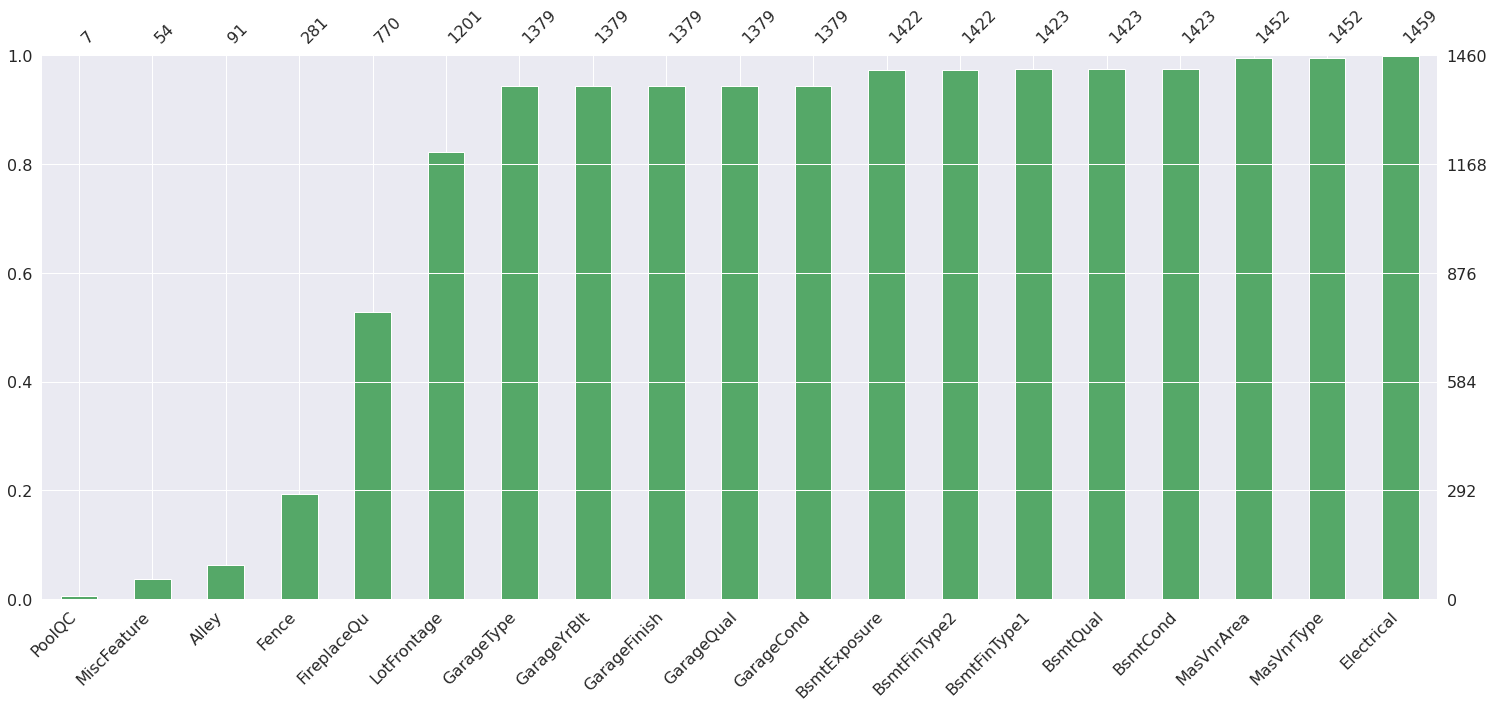

In [554]:
import missingno as mn
mn.bar(house_df[house_df.columns[house_df.isna().any()]], sort="ascending", color='g')

In [555]:
# Get the total of NULL values and percentage of the columns
null_val_cnt = house_df[house_df.columns[house_df.isna().any()]].isna().sum().sort_values(ascending=False)
null_val_percent = (house_df[house_df.columns[house_df.isna().any()]].isna().sum() * 100 / house_df.shape[0]).sort_values(ascending=False)

In [557]:
null_values = pd.concat([null_val_cnt, null_val_percent], axis=1, keys=['Count', 'Percentage'])
null_values

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [558]:
null_values[ null_values['Percentage'] > 15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], dtype='object')

In [559]:
house_df.shape

(1460, 81)

(1408, 81)

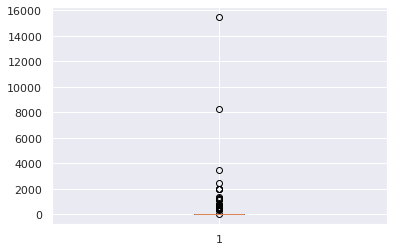

In [560]:
# outlier treatment
plt.boxplot(house_df['MiscVal'])
Q1 = house_df['MiscVal'].quantile(0.25)
Q3 = house_df['MiscVal'].quantile(0.75)
IQR = Q3 - Q1
house_df = house_df[(house_df['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house_df['MiscVal'] <= Q3 + 1.5*IQR)]
house_df.shape

In [561]:
house_df.shape

(1408, 81)

(1297, 81)

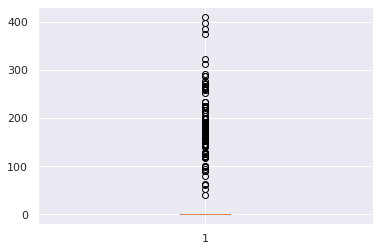

In [562]:
# outlier treatment
plt.boxplot(house_df['ScreenPorch'])
Q1 = house_df['ScreenPorch'].quantile(0.1)
Q3 = house_df['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house_df['ScreenPorch'] <= Q3 + 1.5*IQR)]
house_df.shape

(1279, 81)

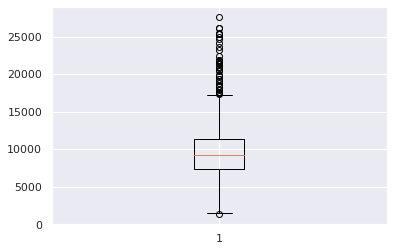

In [564]:
# outlier treatment
plt.boxplot(house_df['LotArea'])
Q1 = house_df['LotArea'].quantile(0.1)
Q3 = house_df['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house_df['LotArea'] <= Q3 + 1.5*IQR)]
house_df.shape

(1275, 81)

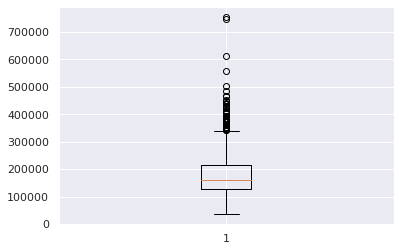

In [565]:
# outlier treatment
plt.boxplot(house_df['SalePrice'])
Q1 = house_df['SalePrice'].quantile(0.1)
Q3 = house_df['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house_df['SalePrice'] <= Q3 + 1.5*IQR)]
house_df.shape

In [566]:
#Checking the correlation Matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.000072,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.000712,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.070250,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.007450,0.351799
LotArea,-0.033226,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,-0.024947,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
YearBuilt,-0.012713,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.825667,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,-0.021998,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.642277,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,-0.050298,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.252691,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.008201,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.153484,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.088011,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.190708,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.322445,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,-0.014969,0.613581


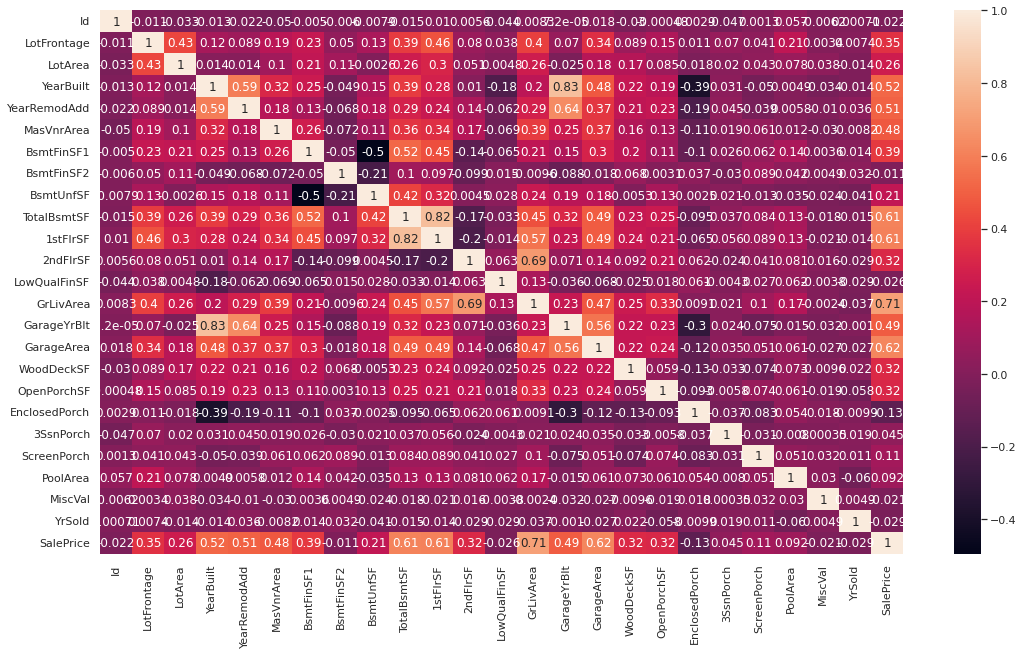

In [567]:
#plotting correlations on a heatmap
#figure size
plt.figure(figsize=(18,10))
# heat map
sns.heatmap(cor, annot=True)
plt.show()

In [568]:
house_df.shape

(1275, 81)

In [569]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1275 non-null   int64  
 1   MSSubClass     1275 non-null   int64  
 2   MSZoning       1275 non-null   object 
 3   LotFrontage    1060 non-null   float64
 4   LotArea        1275 non-null   int64  
 5   Street         1275 non-null   object 
 6   Alley          85 non-null     object 
 7   LotShape       1275 non-null   object 
 8   LandContour    1275 non-null   object 
 9   Utilities      1275 non-null   object 
 10  LotConfig      1275 non-null   object 
 11  LandSlope      1275 non-null   object 
 12  Neighborhood   1275 non-null   object 
 13  Condition1     1275 non-null   object 
 14  Condition2     1275 non-null   object 
 15  BldgType       1275 non-null   object 
 16  HouseStyle     1275 non-null   object 
 17  OverallQual    1275 non-null   int64  
 18  OverallC

In [570]:
house_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       215
LotArea             0
Street              0
Alley            1190
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           34
BsmtCond           34
BsmtExposure       35
BsmtFinType1       34
BsmtFinSF1          0
BsmtFinType2       35
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Check the dataframe

In [571]:
house_df.shape

(1275, 81)

#####iv. Get Numerical Values


In [572]:
# Getting numerical variables
numerical_var = house_numeric.select_dtypes(exclude='object').columns
numerical_var

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'], dtype='object')

#### V. Get Categorical Variables

Checking the distribution on the target variable SalePrice

<Figure size 1440x1080 with 0 Axes>

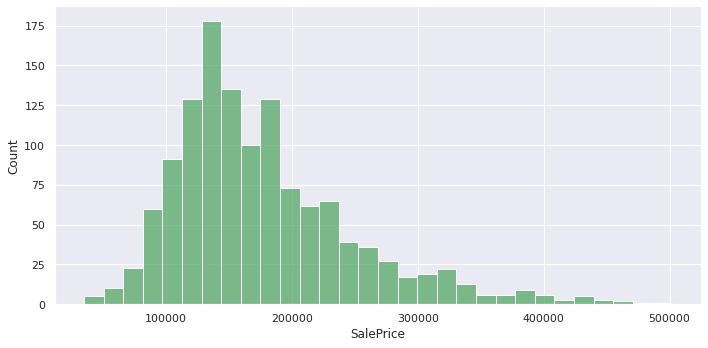

In [573]:
plt.figure(figsize=[20,15])
sns.displot(house_df['SalePrice'], color="g", aspect=2)
plt.show()

In [574]:
# Create the Log Transformed "SalePrice" column
house_df['Transformed_SalePrice'] = np.log(house_df['SalePrice'])

<Figure size 1440x1080 with 0 Axes>

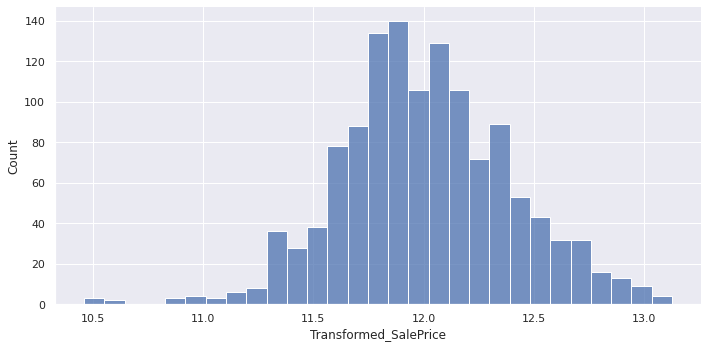

In [575]:
# DisPlot the distribution of a "Transformed_SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(house_df['Transformed_SalePrice'], color="b", aspect=2)
plt.show()

In [576]:
house_df.shape

(1275, 82)

### Step 2: EDA & Visualizing the data


In [577]:
from scipy.stats import norm

#####i. Visualization of Target Variable SalePrice

Text(0.5, 0, '')

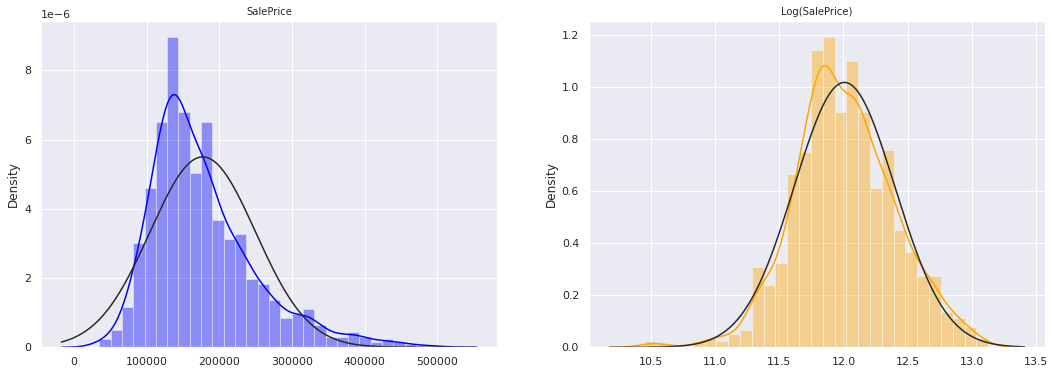

In [578]:
#Visualization of target variable Sales Price
plt.figure(figsize = [18, 6])
plt.subplot(1,2,1)
sns.distplot(house_df['SalePrice'], color="blue", fit = norm)
plt.title('SalePrice', fontsize = 10)
plt.xlabel('')

#Visualization of log(Target) Sales Price

plt.subplot(1,2,2)
sns.distplot(np.log(house_df['SalePrice']), color="orange", fit = norm)
plt.title('Log(SalePrice)', fontsize = 10)
plt.xlabel('')

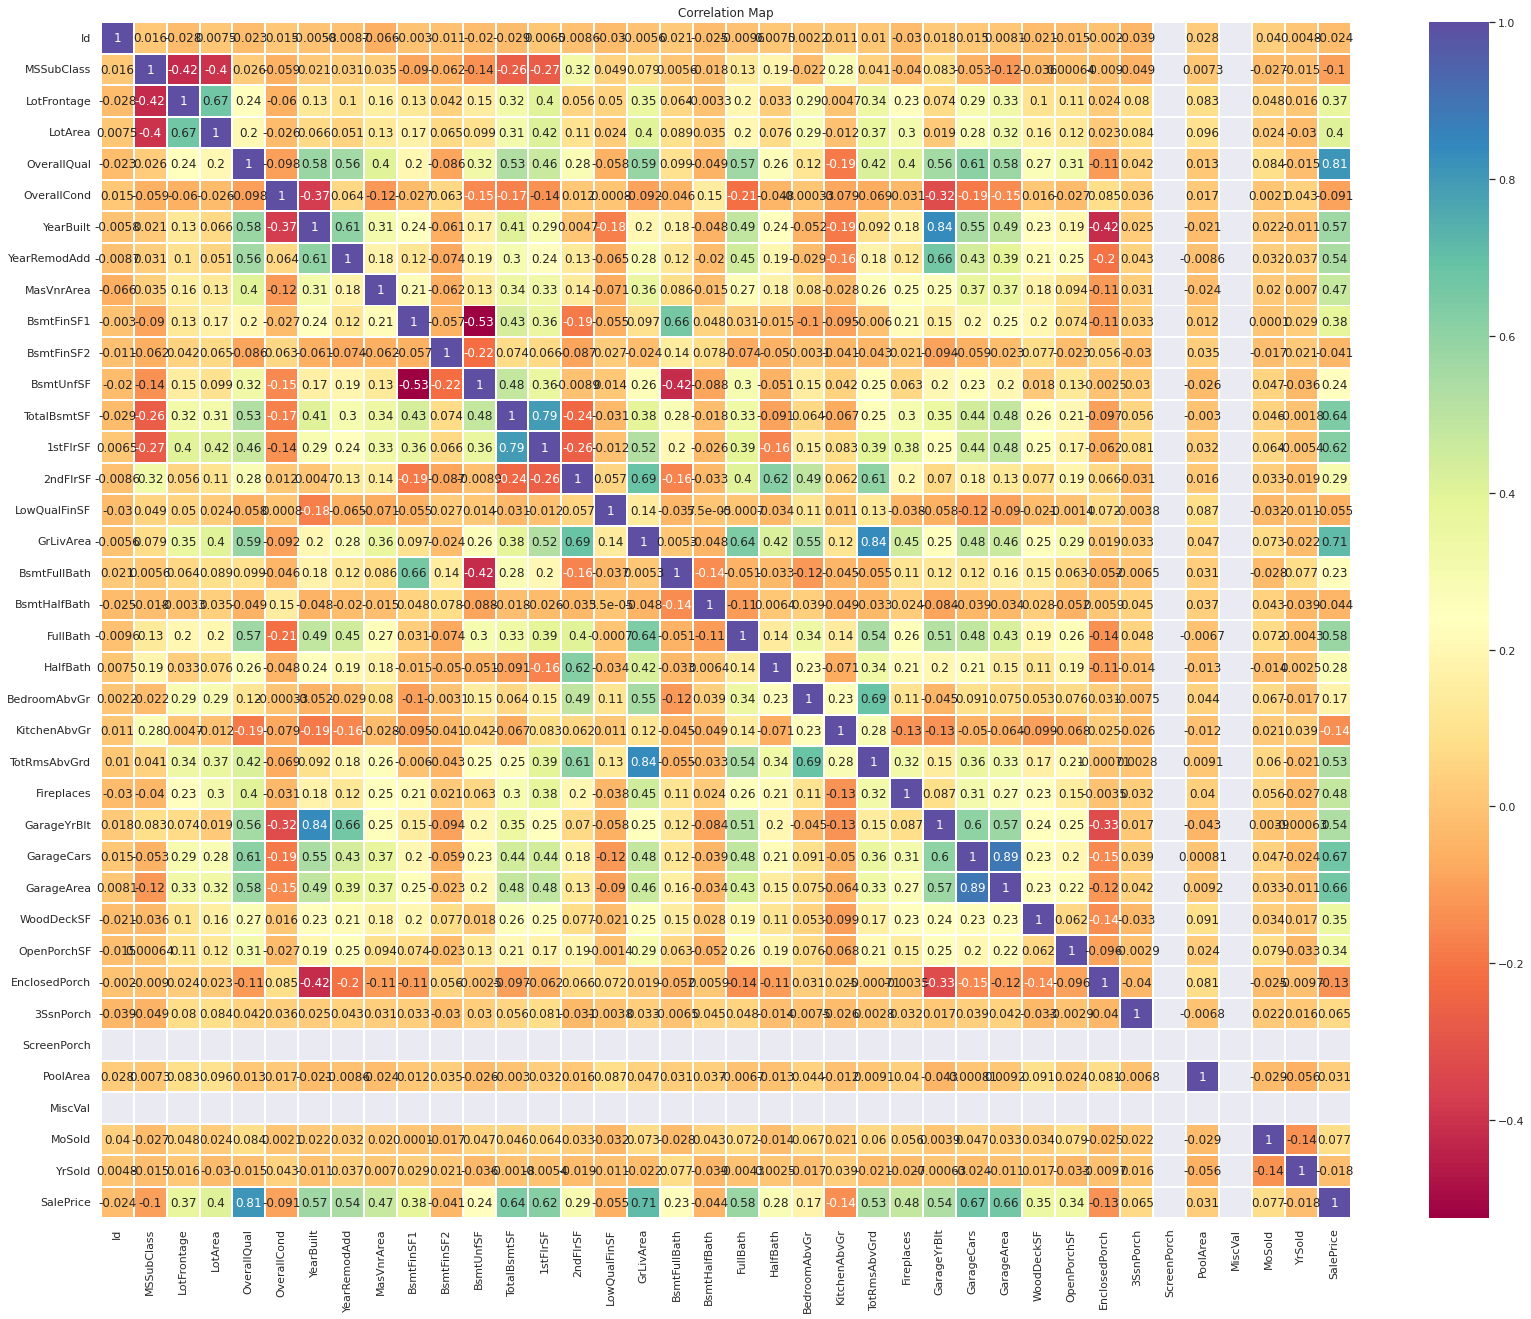

In [579]:
# Checking the correlation of the variables 
plt.figure(figsize = (28,22))
corr = house_df.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
ax= sns.heatmap(corr, annot = True, cmap="Spectral",linewidth =1)
plt.title("Correlation Map")
plt.show()

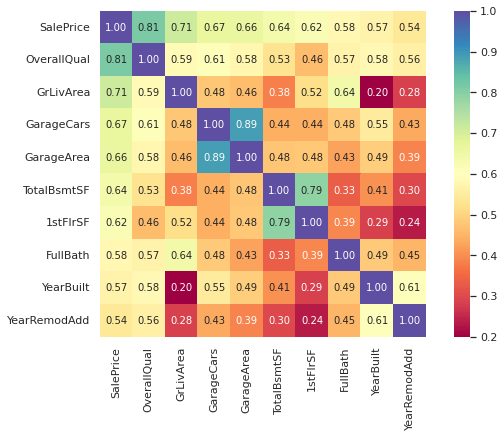

In [580]:
plt.figure(figsize=[10,6])
k = 10 # no. of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(house_df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='Spectral')
plt.show()

#### iv. Merge the original surpirse housing dataframe and dummies dataframe

In [581]:
# Getting categorical variables
categorical_var = house_df.select_dtypes(include='object').columns
print(len(categorical_var))

43


In [582]:
categorical_df = house_df.select_dtypes(include='object')
categorical_df.columns.shape

(43,)

In [583]:
# One Hot Encoding on categorical columns
df_dummies = pd.get_dummies(categorical_df, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0

In [584]:
house_df.drop(list(categorical_df.columns), axis=1, inplace=True)
house_df.shape

(1275, 39)

In [585]:
house_df = pd.concat([house_df, df_dummies], axis=1)
house_df.shape

(1275, 240)

In [586]:
X = house_df.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = house_df['Transformed_SalePrice']

In [587]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [588]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Transformed_SalePrice, dtype: float64

## Step 4: Splitting the surpirse housing data into Train & Test Dataset


In [589]:
# Import library from sklearn from train, test & split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(892, 238)
(892,)


In [590]:
print(X_test.shape)
print(y_test.shape)

(383, 238)
(383,)


In [591]:
house_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1459
Data columns (total 240 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    Id                     1275 non-null   int64  
 1    MSSubClass             1275 non-null   int64  
 2    LotFrontage            1060 non-null   float64
 3    LotArea                1275 non-null   int64  
 4    OverallQual            1275 non-null   int64  
 5    OverallCond            1275 non-null   int64  
 6    YearBuilt              1275 non-null   int64  
 7    YearRemodAdd           1275 non-null   int64  
 8    MasVnrArea             1268 non-null   float64
 9    BsmtFinSF1             1275 non-null   int64  
 10   BsmtFinSF2             1275 non-null   int64  
 11   BsmtUnfSF              1275 non-null   int64  
 12   TotalBsmtSF            1275 non-null   int64  
 13   1stFlrSF               1275 non-null   int64  
 14   2ndFlrSF               1275 non-null  

In [592]:
# Getting numerical variables
numerical_var = X_train.select_dtypes(include=['int64', 'float64']).columns
print(len(numerical_var))
numerical_var

37


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], dtype='object')

In [593]:
X_train.shape

(892, 238)

## Step6: Model Building and Evalution


In [594]:
# Import library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
sc = MinMaxScaler()

# Perform fit and transform on the train dataset
X_train[numerical_var] = sc.fit_transform(X_train[numerical_var])

# Perform only transform on the test dataset
X_test[numerical_var] = sc.transform(X_test[numerical_var])

In [607]:
print(X_train.shape)
print(X_test.shape)

(892, 238)
(383, 238)


###i. Linear Regression

In [610]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [611]:
# Linear Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [612]:
# Check the co-efficients for all the features
coeff = pd.DataFrame(linear_reg.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
Id,-2.140735e-02
MSSubClass,4.429560e-02
LotFrontage,-2.585622e-02
LotArea,1.985519e-01
OverallQual,3.328101e-01
OverallCond,3.058352e-01
YearBuilt,1.981650e-01
YearRemodAdd,4.481543e-02
MasVnrArea,-8.305705e-03
BsmtFinSF1,-1.407472e+11


In [615]:
# Checking the Intercept
linear_reg.intercept_

399618640383.0321

In [619]:
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [620]:
# Making the predictions on test data using the model
y_pred = linear_reg.predict(X_test)

In [621]:
# Showing the actual and predicted values
sh_df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sh_df_result

,Actual,Predicted
1354,12.367341,1.233502e+01
395,11.767568,1.172906e+01
748,12.469974,1.241705e+01
897,11.870271,1.179974e+01
932,12.676076,1.244098e+01
413,11.652687,1.166510e+01
50,12.083905,1.204132e+01
262,11.925035,1.194830e+01
713,11.767568,1.168536e+01
49,11.751942,1.181445e+01


In [622]:
X_train.shape

(892, 238)

In [623]:
X_test.shape

(383, 238)

#####Display the Train & Test data R2,RSS and MSE scores

In [651]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9410369492194829
Test r2 score is : -1.2409462908979268e+22
Train RSS score is : 8.22496872066932
Test RSS score is : 6.954041174434506e+23
Train MSE score is : 0.009220816951423004
Test MSE score is : 1.8156765468497404e+21


From above scores observed that the train score is good, but test score is really underwhelming. This is the same for Mean Squared Error as well. This means that the model is overfitting.

Method
As seen the columns are high, we will use RFE (Recursive Feature Elimination) to select 50 columns first and remove the columns with high VIF

#####Model 1: Build the model using RFE

In [652]:
# Import RFE from library
from sklearn.feature_selection import RFE

In [653]:
X_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=238)

In [654]:
# Instantiate a LinearRegression object
lm = LinearRegression()
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,n_features_to_select=50)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [655]:
# Check the list of selections and ranking of each variable by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 120),
 ('MSSubClass', False, 43),
 ('LotFrontage', False, 108),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 176),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('BsmtHalfBath', False, 169),
 ('FullBath', False, 77),
 ('HalfBath', False, 74),
 ('BedroomAbvGr', False, 18),
 ('KitchenAbvGr', False, 174),
 ('TotRmsAbvGrd', False, 152),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 175),
 ('GarageCars', True, 1),
 ('GarageArea', False, 61),
 ('WoodDeckSF', False, 49),
 ('OpenPorchSF', False, 57),
 ('EnclosedPorch', False, 22),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 7),
 ('PoolArea', True, 1),
 ('MiscVal', False, 9),
 ('MoSold', False, 145),
 ('YrSold', False, 146),
 ('

In [656]:
# Check the 50 variables selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd', 'ExterQual_Fa', 'Foundation_Stone', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_Wall', 'Functional_Maj2', 'Functional_Mod', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Po', 'PoolQC_Fa', 'PoolQC_Gd', 'SaleType_Con', 'SaleType_Oth'], dtype='object')

In [657]:
# Check the variables which were NOT selected by RFE
X_train.columns[~rfe.support_]

Index(['Id', 'MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=188)

##### Build the Model with 50 features

In [658]:
# Creating a dataframe "X_train_rfe" with variables selected by RFE
X_train_rfe = X_train[cols]

In [659]:
X_train_rfe.shape

(892, 50)

In [660]:
# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [661]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [665]:
 y_train = y_train.reset_index(drop=True)
 X_train = X_train.reset_index(drop=True)

In [666]:
X_train_new = build_model(X_train_rfe,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.918
Model:                               OLS   Adj. R-squared:                  0.913
Method:                    Least Squares   F-statistic:                     195.9
Date:                   Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:36:52   Log-Likelihood:                 675.72
No. Observations:                    892   AIC:                            -1253.
Df Residuals:                        843   BIC:                            -1019.
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [667]:
HighVIF = checkVIF(X_train_new)

In [668]:
HighVIF[ HighVIF['VIF'] >=5 ]

,Features,VIF
10,1stFlrSF,inf
8,BsmtUnfSF,inf
13,GrLivArea,inf
12,LowQualFinSF,inf
11,2ndFlrSF,inf
9,TotalBsmtSF,inf
6,BsmtFinSF1,inf
7,BsmtFinSF2,inf
0,const,1693.94
20,MSZoning_RL,37.94


In [669]:
highVIF_cols = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)
len(highVIF_cols)

18

In [670]:
highVIF_cols.remove('const')
len(highVIF_cols)

17

In [671]:
highVIF_cols

['1stFlrSF',
 'BsmtUnfSF',
 'GrLivArea',
 'LowQualFinSF',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'MSZoning_RL',
 'MSZoning_RM',
 'Heating_GasA',
 'GarageType_Attchd',
 'GarageType_Detchd',
 'MSZoning_FV',
 'Heating_GasW',
 'Heating_Grav',
 'GarageQual_TA']

In [672]:
X_train_rfe.shape

(892, 50)

In [673]:
X_train_rfe.drop(highVIF_cols, axis=1, inplace=True)
X_train_rfe.shape

(892, 33)

In [674]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MSZoning_RH,Neighborhood_Crawfor,Neighborhood_MeadowV,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_2.5Fin,Exterior2nd_AsphShn,Exterior2nd_CmentBd,ExterQual_Fa,Foundation_Stone,Heating_Wall,Functional_Maj2,Functional_Mod,GarageType_BuiltIn,GarageQual_Fa,GarageQual_Po,GarageCond_Fa,GarageCond_Po,PoolQC_Fa,PoolQC_Gd,SaleType_Con,SaleType_Oth
0,0.297685,0.444444,0.50,0.496350,0.533333,0.000000,0.25,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.289753,0.666667,0.50,0.948905,0.866667,0.000000,0.50,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.297913,0.555556,0.50,0.656934,0.200000,0.333333,0.25,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.484023,0.666667,0.50,0.978102,0.933333,0.333333,0.75,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.220114,0.444444,0.75,0.620438,0.116667,0.000000,0.25,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Build the model with 31 features

In [675]:
# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                   10.527194
LotArea                  0.528614
OverallQual              1.088069
OverallCond              0.230878
YearBuilt                0.290603
YearRemodAdd             0.139553
Fireplaces               0.242791
GarageCars               0.421814
3SsnPorch                0.076430
PoolArea                -0.127464
MSZoning_RH              0.112641
Neighborhood_Crawfor     0.161366
Neighborhood_MeadowV    -0.111561
Condition2_Feedr         0.057536
Condition2_Norm          0.041698
Condition2_RRNn         -0.142483
HouseStyle_1.5Unf       -0.033494
HouseStyle_2.5Fin        0.192964
Exterior2nd_AsphShn     -0.058174
Exterior2nd_CmentBd      0.052881
ExterQual_Fa             0.017670
Foundation_Stone         0.061233
Heating_Wall            -0.084745
Functional_Maj2         -0.335023
Functional_Mod          -0.155570
GarageType_BuiltIn       0.024400
GarageQual_Fa           -0.016161
GarageQual_Po           -0.092017
GarageCond_Fa           -0.112229
GarageCond_Po 

In [676]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     136.5
Date:                   Wed, 01 Feb 2023   Prob (F-statistic):          3.83e-315
Time:                           15:37:25   Log-Likelihood:                 379.24
No. Observations:                    892   AIC:                            -690.5
Df Residuals:                        858   BIC:                            -527.5
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.5272      0.128     82.448      0.000      10.277      10.778
LotArea                  0.5286      0.043     12.248      0.000       0.444       0.613
OverallQual              1.0881      0.055     19.605      0.000       0.979       1.197
OverallCond              0.2309      0.049      4.688      0.000       0.134       0.328
YearBuilt                0.2906      0.046      6.387      0.000       0.201       0.380
YearRemodAdd             0.1396      0.023      6.094      0.000       0.095       0.185
Fireplaces               0.2428      0.031      7.866      0.000       0.182       0.303
GarageCars               0.4218      0.041     10.387      0.000       0.342       0.502
3SsnPorch                0.0764      0.085      0.902      0.367      -0.090       0.243
PoolArea                -0.1275      0.210     -0.607      0.544      -0.539       0.285
MSZoning_RH              0.1126      0.048      2.337      0.020       0.018       0.207
Neighborhood_Crawfor     0.1614      0.033      4.895      0.000       0.097       0.226
Neighborhood_MeadowV    -0.1116      0.061     -1.842      0.066      -0.230       0.007
Condition2_Feedr         0.0575      0.146      0.395      0.693      -0.228       0.343
Condition2_Norm          0.0417      0.118      0.352      0.725      -0.191       0.274
Condition2_RRNn         -0.1425      0.165     -0.861      0.389      -0.467       0.182
HouseStyle_1.5Unf       -0.0335      0.062     -0.537      0.591      -0.156       0.089
HouseStyle_2.5Fin        0.1930      0.075      2.588      0.010       0.047       0.339
Exterior2nd_AsphShn     -0.0582      0.162     -0.359      0.720      -0.377       0.260
Exterior2nd_CmentBd      0.0529      0.032      1.637      0.102      -0.011       0.116
ExterQual_Fa             0.0177      0.061      0.290      0.772      -0.102       0.137
Foundation_Stone         0.0612      0.083      0.734      0.463      -0.103       0.225
Heating_Wall            -0.0847      0.116     -0.734      0.463      -0.311       0.142
Functional_Maj2         -0.3350      0.089     -3.766      0.000      -0.510      -0.160
Functional_Mod          -0.1556      0.073     -2.140      0.033      -0.298      -0.013
GarageType_BuiltIn       0.0244      0.023      1.048      0.295      -0.021       0.070
GarageQual_Fa           -0.0162      0.036     -0.448      0.654      -0.087       0.055
GarageQual_Po           -0.0920      0.210     -0.438      0.661      -0.504       0.320
GarageCond_Fa           -0.1122      0.041     -2.732      0.006      -0.193      -0.032
GarageCond_Po           -0.0179      0.166     -0.108      0.914      -0.344       0.308
PoolQC_Fa                0.1165      0.265      0.440      0.660      -0.403       0.636
PoolQC_Gd               

In [677]:
print(X_train_rfe.shape)
print(X_test.shape)

(892, 33)
(383, 238)


In [678]:
names = X_train_rfe.columns
# We will create a new dataframe "X_test_new" by removing the columns dropped by the train data set
X_test_new = X_test[names]
X_test_new.shape

(383, 33)

In [679]:
# Add a constant
X_test_new = sm.add_constant(X_test_new)
X_test_new.shape

(383, 34)

#### Final Model Linear Regression Evaluation

In [680]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8400249615285567
Test r2 score is : 0.8033221623680153
Train RSS score is : 22.315495383937346
Test RSS score is : 24.558511771850075
Train MSE score is : 0.025017371506656217
Test MSE score is : 0.02877669563080947


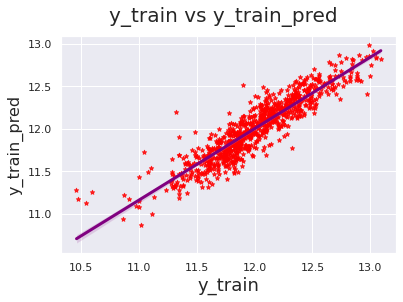

In [681]:
# Plot the graph b/w actual & predicted values with train data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'red',"s": 20}, line_kws = {"color": 'purple', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

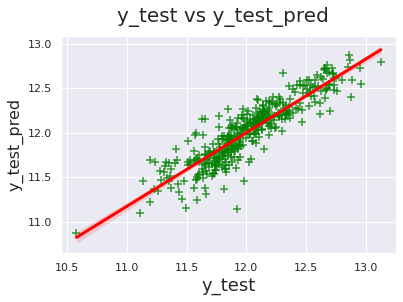

In [682]:
# Plot the graph b/w actual & predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'green',"s": 50}, line_kws = {"color": 'red', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

#### Residual analysis of Train data

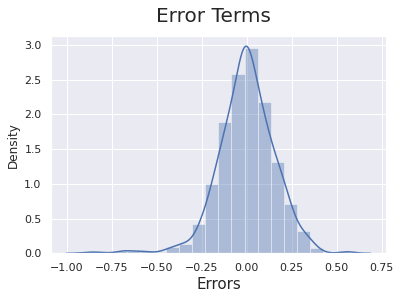

In [683]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

#### Residual Anlaysis of Test Data

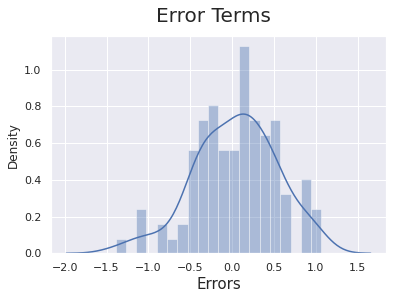

In [684]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

#### Linear Regression features and coefficients

In [686]:
df_linear = pd.DataFrame(index=X_train_rfe.columns)
df_linear.rows = X_train_rfe.columns
df_linear['Linear'] = lm.params
df_linear

,Linear
LotArea,0.528614
OverallQual,1.088069
OverallCond,0.230878
YearBuilt,0.290603
YearRemodAdd,0.139553
Fireplaces,0.242791
GarageCars,0.421814
3SsnPorch,0.076430
PoolArea,-0.127464
MSZoning_RH,0.112641


#### Display the list of 31 features

In [687]:
# List of 31 features
names = X_train_rfe.columns
print(len(names))
print(list(names))

33
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MSZoning_RH', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd', 'ExterQual_Fa', 'Foundation_Stone', 'Heating_Wall', 'Functional_Maj2', 'Functional_Mod', 'GarageType_BuiltIn', 'GarageQual_Fa', 'GarageQual_Po', 'GarageCond_Fa', 'GarageCond_Po', 'PoolQC_Fa', 'PoolQC_Gd', 'SaleType_Con', 'SaleType_Oth']


### ii. Ridge Regression


In [688]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [689]:
# Get only 31 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]
print(X_train.shape)
print(X_test.shape)

(892, 33)
(383, 33)


In [690]:
# list of alpha values to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
# Applying lasso regression with 5 fold cross validation

ridge_reg = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge_reg,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [691]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005236,0.002471,0.002629,0.000314,0.0001,{'alpha': 0.0001},-0.122651,-0.126002,-0.138059,-0.116338,-0.105091,-0.121628,0.010878,15,-0.115569,-0.115251,-0.111797,-0.118085,-0.120117,-0.116164,0.002814
1,0.004099,0.000150,0.002567,0.000099,0.001,{'alpha': 0.001},-0.122650,-0.126000,-0.138059,-0.116335,-0.105087,-0.121626,0.010879,14,-0.115570,-0.115252,-0.111798,-0.118087,-0.120118,-0.116165,0.002814
2,0.004127,0.000267,0.002523,0.000077,0.01,{'alpha': 0.01},-0.122647,-0.125983,-0.138060,-0.116307,-0.105047,-0.121609,0.010892,13,-0.115585,-0.115260,-0.111806,-0.118105,-0.120128,-0.116177,0.002815
3,0.006202,0.003486,0.002887,0.000523,0.05,{'alpha': 0.05},-0.122631,-0.125908,-0.138059,-0.116193,-0.104884,-0.121535,0.010947,12,-0.115645,-0.115296,-0.111839,-0.118169,-0.120167,-0.116223,0.002820
4,0.006450,0.002792,0.002697,0.000195,0.1,{'alpha': 0.1},-0.122612,-0.125820,-0.138058,-0.116071,-0.104703,-0.121453,0.011006,11,-0.115707,-0.115336,-0.111869,-0.118240,-0.120209,-0.116272,0.002827


In [692]:
ridge_cv_results.shape

(28, 21)

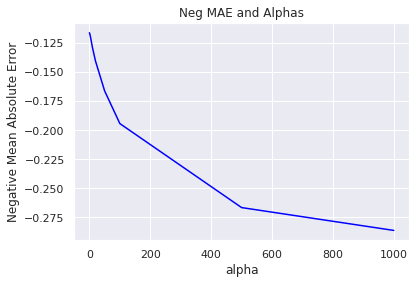

In [693]:
# Plot the train scores with alpha

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

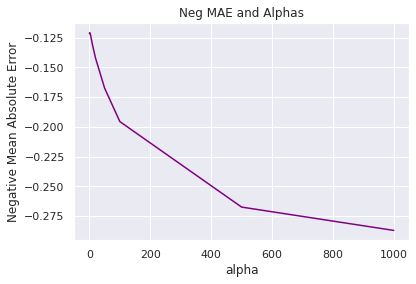

In [694]:
# Plot the testing scores with alpha
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'], color='purple')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

#### Getting the Best Value

In [695]:
optimalvalue_ridge = ridge_model_cv.best_params_['alpha']
optimalvalue_ridge

1.0

#### Build the Ridge Model

In [696]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge()

In [697]:
ridge.coef_

array([ 0.49725478,  1.00277176,  0.21611481,  0.29178742,  0.15430954,
        0.25896116,  0.43834128,  0.06460165, -0.00920026,  0.10419048,
        0.16448078, -0.12090999,  0.04938329,  0.04796564, -0.09440863,
       -0.02773562,  0.16426646, -0.02670601,  0.05533853,  0.01156842,
        0.04578935, -0.06792181, -0.27819309, -0.13125618,  0.02878187,
       -0.02151197, -0.06607948, -0.10852486, -0.04181479, -0.00368219,
        0.04973118,  0.04323302, -0.13108725])

#### Ridge Features and Coefficients

In [698]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
LotArea,0.497255
OverallQual,1.002772
OverallCond,0.216115
YearBuilt,0.291787
YearRemodAdd,0.154310
Fireplaces,0.258961
GarageCars,0.438341
3SsnPorch,0.064602
PoolArea,-0.009200
MSZoning_RH,0.104190


#### Ridge Regression Model Evaluation

In [699]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8389550699286129
Test r2 score is : 0.8069387718295302
Train RSS score is : 22.464738423901494
Test RSS score is : 10.818806097666744
Train MSE score is : 0.025184684331728133
Test MSE score is : 0.02824753550304633


###iii.Lasso Regression

In [700]:
# Import the required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [701]:
# Get only 31 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]
print(X_train.shape)
print(X_test.shape)

(892, 33)
(383, 33)


In [702]:
# List of alpha values to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [703]:
lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011945,0.002904,0.002945,0.000676,0.0001,{'alpha': 0.0001},-0.122846,-0.125403,-0.138691,-0.114815,-0.103781,-0.121107,0.011580,1,-0.116133,-0.115836,-0.112409,-0.118610,-0.120642,-0.116726,0.002781
1,0.009604,0.000238,0.003278,0.001506,0.001,{'alpha': 0.001},-0.126252,-0.124813,-0.140214,-0.112558,-0.103855,-0.121539,0.012450,2,-0.118842,-0.118250,-0.115239,-0.122205,-0.123657,-0.119639,0.002988
2,0.007621,0.002807,0.002636,0.000162,0.01,{'alpha': 0.01},-0.147260,-0.138626,-0.161592,-0.140313,-0.128729,-0.143304,0.010893,3,-0.142908,-0.141140,-0.137754,-0.144300,-0.145240,-0.142268,0.002647
3,0.006165,0.004473,0.002615,0.000323,0.05,{'alpha': 0.05},-0.282549,-0.265062,-0.288184,-0.269879,-0.265083,-0.274151,0.009493,4,-0.271991,-0.277690,-0.270326,-0.273584,-0.274023,-0.273522,0.002457
4,0.004002,0.000078,0.002451,0.000095,0.1,{'alpha': 0.1},-0.320613,-0.307279,-0.321914,-0.307380,-0.301824,-0.311802,0.007993,5,-0.309536,-0.312663,-0.308228,-0.312113,-0.313293,-0.311167,0.001947


In [704]:
lasso_cv_results.shape

(28, 21)

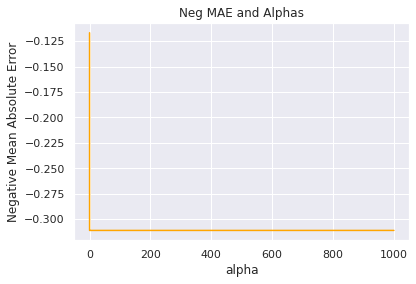

In [705]:
# Plot the train scores with alpha

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

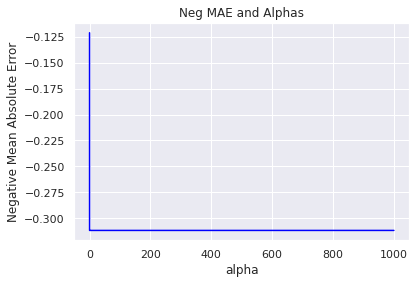

In [706]:
# Plotting testing scores with alpha
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

#### Get the Best Value for alpha

In [707]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [708]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [709]:
lasso.coef_

array([ 0.52072574,  1.09022215,  0.22774119,  0.28582426,  0.14178772,
        0.24337895,  0.42378864,  0.05324419, -0.        ,  0.10665814,
        0.1586756 , -0.09783075,  0.        ,  0.00443273, -0.13513539,
       -0.03190565,  0.17724837, -0.        ,  0.0462193 ,  0.01124401,
        0.03699135, -0.04008277, -0.32419596, -0.13763469,  0.02295176,
       -0.01706368, -0.05147055, -0.10657095, -0.0193082 , -0.        ,
        0.        ,  0.        , -0.17028882])

#### Lasso features and their co-efficients

In [710]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.520726
OverallQual,1.090222
OverallCond,0.227741
YearBuilt,0.285824
YearRemodAdd,0.141788
Fireplaces,0.243379
GarageCars,0.423789
3SsnPorch,0.053244
PoolArea,-0.000000
MSZoning_RH,0.106658


#### Lasso Regression Model Evaluation

In [711]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8395598551878842
Test r2 score is : 0.8078433370073235
Train RSS score is : 22.38037474572708
Test RSS score is : 10.768115882163684
Train MSE score is : 0.025090106217182828
Test MSE score is : 0.02811518507092346


### iv. Compare the Linear, Ridge and Lasso Coefficients

In [712]:
compare_df = pd.DataFrame(index=X_train.columns)
compare_df.rows = X_train.columns

compare_df['Linear'] = lm.params
compare_df['Ridge'] = ridge.coef_
compare_df['Lasso'] = lasso.coef_
compare_df.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,1.088069,1.002772,1.090222
LotArea,0.528614,0.497255,0.520726
GarageCars,0.421814,0.438341,0.423789
YearBuilt,0.290603,0.291787,0.285824
Fireplaces,0.242791,0.258961,0.243379
OverallCond,0.230878,0.216115,0.227741
HouseStyle_2.5Fin,0.192964,0.164266,0.177248
Neighborhood_Crawfor,0.161366,0.164481,0.158676
YearRemodAdd,0.139553,0.154310,0.141788
MSZoning_RH,0.112641,0.104190,0.106658


Inference:

From above table observed that there are 31 significant features in the model
The co-efficients are very close for Ridge and Lasso Regression models post regularization with minimal variance to the model created by Linear Regression
The features are sorted in the order of decreasing significance of the co-efficients 
The resultant selection of significant feature order still remains the same

### v.Compare the metrics after Regularization

In [714]:
 #Create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metrics = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metrics

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.840025,0.838955,0.839560
1,R2 Score (Test),0.803322,0.806939,0.807843
2,RSS (Train),22.315495,22.464738,22.380375
3,RSS (Test),24.558512,10.818806,10.768116
4,MSE (Train),0.158169,0.158697,0.158399
5,MSE (Test),0.169637,0.168070,0.167676


Inference:
From the above table observed that 
i. The R2 Score, RSS and MSE are all very close for Linear Regression, Ridge and Lasso Regressions
ii. Lasso Regression has better scores by a very slight margin compared to Ridge Regression and Linear Regression

### vi.Double the Alpha Values

In [715]:
# Doubling Lasso and Ridge Regression's alpha values
optimalvalue_ridge *= 2
optimalvalue_lasso *= 2
print(f"Doubled alpha values of Ridge is {optimalvalue_ridge} and Lasso is {optimalvalue_lasso}")

Doubled alpha values of Ridge is 2.0 and Lasso is 0.0002


##### Build Ridge Regression 

In [716]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [717]:
ridge.coef_

array([ 4.74196818e-01,  9.35264473e-01,  1.99847666e-01,  2.90539333e-01,
        1.67492484e-01,  2.70627873e-01,  4.46989164e-01,  5.63991321e-02,
        8.25696637e-04,  9.60990404e-02,  1.65816598e-01, -1.24819893e-01,
        3.78313893e-02,  4.54039456e-02, -7.41796455e-02, -2.48082573e-02,
        1.42801457e-01, -1.73084743e-02,  5.59774372e-02,  5.37009332e-03,
        3.57331658e-02, -5.77734967e-02, -2.40622833e-01, -1.14323502e-01,
        3.22954327e-02, -2.62439884e-02, -5.87913407e-02, -1.05514525e-01,
       -4.51193219e-02, -7.23169332e-03,  3.10137326e-02,  2.94422411e-02,
       -8.85357229e-02])

In [718]:
sh_df_ridge = pd.DataFrame(index=X_train.columns)
sh_df_ridge.rows = X_train.columns
sh_df_ridge['Ridge'] = ridge.coef_
sh_df_ridge

,Ridge
LotArea,0.474197
OverallQual,0.935264
OverallCond,0.199848
YearBuilt,0.290539
YearRemodAdd,0.167492
Fireplaces,0.270628
GarageCars,0.446989
3SsnPorch,0.056399
PoolArea,0.000826
MSZoning_RH,0.096099


#### Ridge Model Evalution

In [719]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_double_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8369082228408352
Test r2 score is : 0.8062548103220942
Train RSS score is : 22.750260510192987
Test RSS score is : 10.857134077848677
Train MSE score is : 0.025504776356718595
Test MSE score is : 0.02834760855835164


Build Lasso Regressiion Model

In [720]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [721]:
lasso.coef_

array([ 0.51715757,  1.0934325 ,  0.22087419,  0.27768929,  0.14444611,
        0.24404651,  0.42557631,  0.02986792, -0.        ,  0.10110814,
        0.15510054, -0.08310008,  0.        ,  0.00612109, -0.08870068,
       -0.02476742,  0.1617545 , -0.        ,  0.03977713,  0.00130232,
        0.01167536, -0.        , -0.31391143, -0.12041972,  0.02142557,
       -0.01766669, -0.01287225, -0.10254146, -0.02265248, -0.        ,
        0.        ,  0.        , -0.07946981])

#### Lasso Features and coefficients

In [722]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.517158
OverallQual,1.093432
OverallCond,0.220874
YearBuilt,0.277689
YearRemodAdd,0.144446
Fireplaces,0.244047
GarageCars,0.425576
3SsnPorch,0.029868
PoolArea,-0.000000
MSZoning_RH,0.101108


Lasso Regression Evaulation

In [723]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_double_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8388618606223104
Test r2 score is : 0.811617621933224
Train RSS score is : 22.477740526382036
Test RSS score is : 10.556611702077305
Train MSE score is : 0.025199260679800488
Test MSE score is : 0.02756295483571098


In [724]:
compare_df['Ridge_Double'] = ridge.coef_
compare_df['Lasso_Double'] = lasso.coef_
compare_df.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,1.088069,1.002772,1.090222,0.935264,1.093432
LotArea,0.528614,0.497255,0.520726,0.474197,0.517158
GarageCars,0.421814,0.438341,0.423789,0.446989,0.425576
YearBuilt,0.290603,0.291787,0.285824,0.290539,0.277689
Fireplaces,0.242791,0.258961,0.243379,0.270628,0.244047
OverallCond,0.230878,0.216115,0.227741,0.199848,0.220874
HouseStyle_2.5Fin,0.192964,0.164266,0.177248,0.142801,0.161755
Neighborhood_Crawfor,0.161366,0.164481,0.158676,0.165817,0.155101
YearRemodAdd,0.139553,0.154310,0.141788,0.167492,0.144446
MSZoning_RH,0.112641,0.104190,0.106658,0.096099,0.101108


Comparison of metrics after Regularization for Double Regression

In [725]:
rg_metric = pd.Series(metric_double_r, name = 'Double Ridge Regression')
ls_metric = pd.Series(metric_double_l, name = 'Double Lasso Regression')

final_metrics_double = pd.concat([final_metrics, rg_metric, ls_metric], axis = 1)

final_metrics_double

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),0.840025,0.838955,0.839560,0.836908,0.838862
1,R2 Score (Test),0.803322,0.806939,0.807843,0.806255,0.811618
2,RSS (Train),22.315495,22.464738,22.380375,22.750261,22.477741
3,RSS (Test),24.558512,10.818806,10.768116,10.857134,10.556612
4,MSE (Train),0.158169,0.158697,0.158399,0.159702,0.158743
5,MSE (Test),0.169637,0.168070,0.167676,0.168367,0.166021


In [726]:
# Looking at the current top 5 important predictor variables in Lasso model
compare_df.sort_values(by='Lasso',ascending=False).Lasso.head(5)

OverallQual    1.090222
LotArea        0.520726
GarageCars     0.423789
YearBuilt      0.285824
Fireplaces     0.243379
Name: Lasso, dtype: float64

In [727]:
top5_vars = list(compare_df['Lasso'].sort_values(ascending=False).head(5).index)
top5_vars

['OverallQual', 'LotArea', 'GarageCars', 'YearBuilt', 'Fireplaces']

In [728]:
# Drop the top 5 important predictor variables from X_train and X_test
X_train = X_train.drop(top5_vars, axis=1)
X_test = X_test.drop(top5_vars, axis=1)
print(X_train.shape)
print(X_test.shape)

(892, 28)
(383, 28)


In [729]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
# Applying lasso regression with 5 fold cross validation

lasso_new = Lasso()
folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso_new,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [730]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009711,0.002484,0.003196,0.001006,0.0001,{'alpha': 0.0001},-0.237223,-0.211580,-0.255027,-0.228185,-0.211308,-0.228665,0.016502,1,-0.217046,-0.224616,-0.212110,-0.219821,-0.222547,-0.219228,0.004378
1,0.010868,0.001967,0.003654,0.001448,0.001,{'alpha': 0.001},-0.239070,-0.213467,-0.256914,-0.223706,-0.210776,-0.228787,0.017215,2,-0.222040,-0.227387,-0.216645,-0.225494,-0.227281,-0.223769,0.004053
2,0.010586,0.000594,0.002879,0.000190,0.01,{'alpha': 0.01},-0.255996,-0.229338,-0.269125,-0.247033,-0.235625,-0.247423,0.014219,3,-0.241867,-0.249974,-0.240244,-0.246623,-0.249917,-0.245725,0.004034
3,0.013114,0.005190,0.003147,0.001023,0.05,{'alpha': 0.05},-0.282549,-0.265062,-0.288184,-0.269879,-0.265083,-0.274151,0.009493,4,-0.271991,-0.277690,-0.270326,-0.273584,-0.274023,-0.273522,0.002457
4,0.011315,0.002404,0.003095,0.000841,0.1,{'alpha': 0.1},-0.320613,-0.307279,-0.321914,-0.307380,-0.301824,-0.311802,0.007993,5,-0.309536,-0.312663,-0.308228,-0.312113,-0.313293,-0.311167,0.001947


In [731]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [732]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [733]:
lasso.coef_

array([-0.3410385 ,  0.59945346,  0.18937043,  0.10369561, -0.13809836,
        0.38303374, -0.71675594, -0.09340477,  0.        , -0.25934469,
       -0.1274374 ,  0.06048412, -0.22479273,  0.22102187, -0.34070659,
       -0.06669011, -0.26029023, -0.75472619, -0.25293289,  0.19227334,
       -0.1972602 , -0.09359924, -0.2415322 , -0.05839604, -0.03222194,
        0.        ,  0.        , -0.56175551])

In [734]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_

In [735]:
df_lasso.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
YearRemodAdd,0.599453
Neighborhood_Crawfor,0.383034
Exterior2nd_CmentBd,0.221022
GarageType_BuiltIn,0.192273
3SsnPorch,0.189370


## Step7: Conclusion      
##### The top 10 predictor variables that influences are shown below table
  

In [736]:
compare_df.sort_values(by='Lasso', ascending=False).head(10)

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,1.088069,1.002772,1.090222,0.935264,1.093432
LotArea,0.528614,0.497255,0.520726,0.474197,0.517158
GarageCars,0.421814,0.438341,0.423789,0.446989,0.425576
YearBuilt,0.290603,0.291787,0.285824,0.290539,0.277689
Fireplaces,0.242791,0.258961,0.243379,0.270628,0.244047
OverallCond,0.230878,0.216115,0.227741,0.199848,0.220874
HouseStyle_2.5Fin,0.192964,0.164266,0.177248,0.142801,0.161755
Neighborhood_Crawfor,0.161366,0.164481,0.158676,0.165817,0.155101
YearRemodAdd,0.139553,0.154310,0.141788,0.167492,0.144446
MSZoning_RH,0.112641,0.104190,0.106658,0.096099,0.101108
